## [Anggara Putra Pratama](https://www.dicoding.com/users/anggaraputrapratama)

Proyek Pertama : Membuat Model NLP dengan TensorFlow

Dataset: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment

# Kaggle Dataset
saya menggunakan kaggle API

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anggaraputrapratama","key":"e1600b2f78ddcf817548e85f037414ec"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d crowdflower/twitter-airline-sentiment

  0% 0.00/2.55M [00:00<?, ?B/s]
100% 2.55M/2.55M [00:00<00:00, 89.3MB/s]


In [7]:
! unzip twitter-airline-sentiment.zip

Archive:  twitter-airline-sentiment.zip
  inflating: Tweets.csv              
  inflating: database.sqlite         


# Import Library

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [9]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [11]:
df_1 = df[['text', 'airline_sentiment']]
df_1

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


# Visualize Dataset
Visualize airline_sentiment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


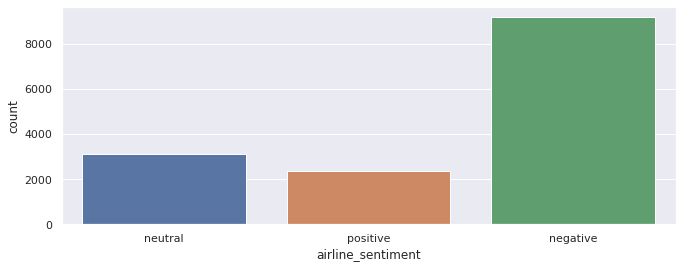

In [12]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11,4)})
sns.countplot(df_1['airline_sentiment'])

# Text Processing

In [13]:
import re

def clean(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text) # remove square brackets
  text = re.sub(r'[^\w\s]','',text) # remove punctuation
  text = re.sub('\w*\d\w*', '', text) # remove words containing numbers
  text = re.sub('\n', '', text)
  return text

In [14]:
df_1['text'] =  df_1['text'].apply(clean)
df_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,airline_sentiment
0,virginamerica what dhepburn said,neutral
1,virginamerica plus youve added commercials to ...,positive
2,virginamerica i didnt today must mean i need t...,neutral
3,virginamerica its really aggressive to blast o...,negative
4,virginamerica and its a really big bad thing a...,negative
...,...,...
14635,americanair thank you we got on a different fl...,positive
14636,americanair leaving over minutes late flight ...,negative
14637,americanair please bring american airlines to,neutral
14638,americanair you have my money you change my fl...,negative


In [15]:
df_1.rename(columns={"text": "clean_text"})

,clean_text,airline_sentiment
0,virginamerica what dhepburn said,neutral
1,virginamerica plus youve added commercials to ...,positive
2,virginamerica i didnt today must mean i need t...,neutral
3,virginamerica its really aggressive to blast o...,negative
4,virginamerica and its a really big bad thing a...,negative
...,...,...
14635,americanair thank you we got on a different fl...,positive
14636,americanair leaving over minutes late flight ...,negative
14637,americanair please bring american airlines to,neutral
14638,americanair you have my money you change my fl...,negative


In [16]:
kategori = pd.get_dummies(df_1.airline_sentiment)
df_baru = pd.concat([df_1, kategori], axis = 1)
df_baru = df_baru.drop(columns='airline_sentiment')
df_baru

,text,negative,neutral,positive
0,virginamerica what dhepburn said,0,1,0
1,virginamerica plus youve added commercials to ...,0,0,1
2,virginamerica i didnt today must mean i need t...,0,1,0
3,virginamerica its really aggressive to blast o...,1,0,0
4,virginamerica and its a really big bad thing a...,1,0,0
...,...,...,...,...
14635,americanair thank you we got on a different fl...,0,0,1
14636,americanair leaving over minutes late flight ...,1,0,0
14637,americanair please bring american airlines to,0,1,0
14638,americanair you have my money you change my fl...,1,0,0


In [17]:
tweets = df_baru['text'].values
label = df_baru[['negative', 'neutral', 'positive']].values

In [18]:
from sklearn.model_selection import train_test_split
tweets_latih, tweets_test, label_latih, label_test = train_test_split(tweets, label, test_size=0.2, random_state=42)

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, lower =True, split=' ')
tokenizer.fit_on_texts(tweets_latih) 
tokenizer.fit_on_texts(tweets_test)
 
sekuens_latih = tokenizer.texts_to_sequences(tweets_latih)
sekuens_test = tokenizer.texts_to_sequences(tweets_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [20]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(200),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

In [21]:

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

num_epochs = 10
history = model.fit(padded_latih, label_latih, batch_size = 8,epochs=num_epochs, 
                    validation_data=(padded_test, label_test), callbacks=[callback], verbose=2)

Epoch 1/10
1464/1464 - 38s - loss: 0.7258 - accuracy: 0.6940 - val_loss: 0.6492 - val_accuracy: 0.7418 - 38s/epoch - 26ms/step
Epoch 2/10
1464/1464 - 24s - loss: 0.6113 - accuracy: 0.7608 - val_loss: 0.5743 - val_accuracy: 0.7725 - 24s/epoch - 16ms/step
Epoch 3/10
1464/1464 - 25s - loss: 0.5506 - accuracy: 0.7940 - val_loss: 0.5194 - val_accuracy: 0.7951 - 25s/epoch - 17ms/step
Epoch 4/10
1464/1464 - 24s - loss: 0.5065 - accuracy: 0.8143 - val_loss: 0.5348 - val_accuracy: 0.7930 - 24s/epoch - 17ms/step
Epoch 5/10
1464/1464 - 24s - loss: 0.4837 - accuracy: 0.8201 - val_loss: 0.6526 - val_accuracy: 0.7620 - 24s/epoch - 16ms/step
Epoch 6/10
1464/1464 - 25s - loss: 0.4656 - accuracy: 0.8320 - val_loss: 0.5338 - val_accuracy: 0.8043 - 25s/epoch - 17ms/step


In [22]:
results = model.evaluate(padded_test, label_test)
print(results)

92/92 [==============================] - 1s 7ms/step - loss: 0.5338 - accuracy: 0.8043
[0.5338175892829895, 0.8043032884597778]


In [23]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

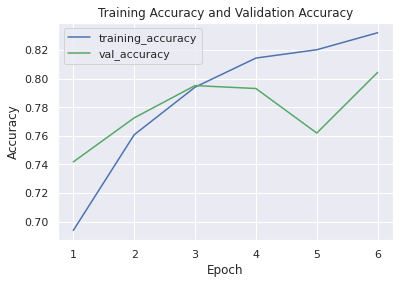

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, len(accuracy)+1), accuracy, 'b', label='training_accuracy')
plt.plot(range(1, len(val_accuracy)+1), val_accuracy, 'g', label='val_accuracy')
plt.title('Training Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

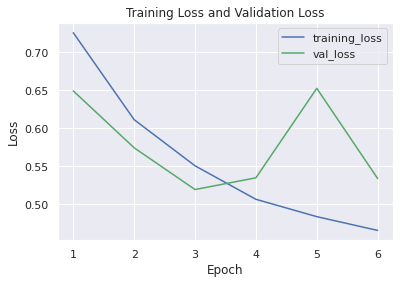

In [25]:
plt.plot(range(1, len(loss)+1), loss, 'b', label='training_loss')
plt.plot(range(1, len(val_loss)+1), val_loss, 'g', label='val_loss')
plt.title('Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()